**HR Analytics Problem**

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

They have provided multiple attributes around Employee's past and current performance along with demographics.

**PROBLEM STATEMENT:**
Predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Train dataset

In [2]:
df=pd.read_csv('/content/train_LZdllcl.csv')

In [27]:
df_test=pd.read_csv('/content/test_2umaH9m.csv')

In [3]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [28]:
df_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


# Data Analysis

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.shape

(54808, 14)

In [35]:
df_test.shape

(23490, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [11]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [13]:
df.describe(include=['object','category'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Target Column: is_promoted

**Classification Problem** as target column is categorical

In [6]:
df['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


In [16]:
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [29]:
cat_col=df.select_dtypes(include=['object','category']).columns
cat_col

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [7]:
# null value checking
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [33]:
df_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [9]:
# duplicates
df.duplicated().sum()

np.int64(0)

In [34]:
df_test.duplicated().sum()

np.int64(0)

<Axes: xlabel='age', ylabel='Count'>

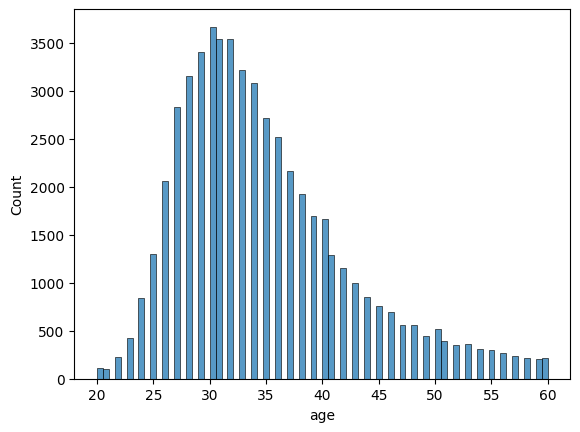

In [14]:
sns.histplot(x=df['age'])

<Axes: xlabel='education', ylabel='Count'>

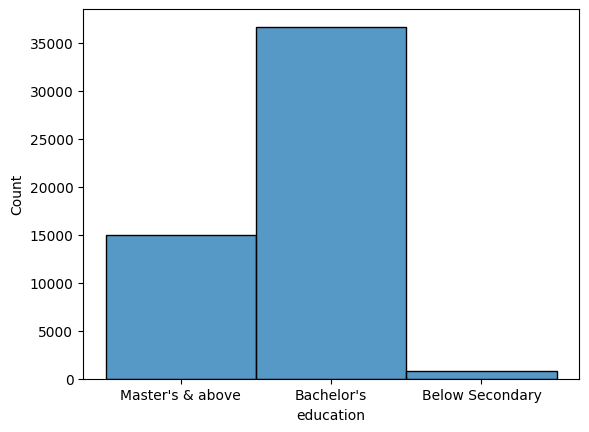

In [8]:
sns.histplot(x=df['education'])

<Axes: xlabel='previous_year_rating', ylabel='Count'>

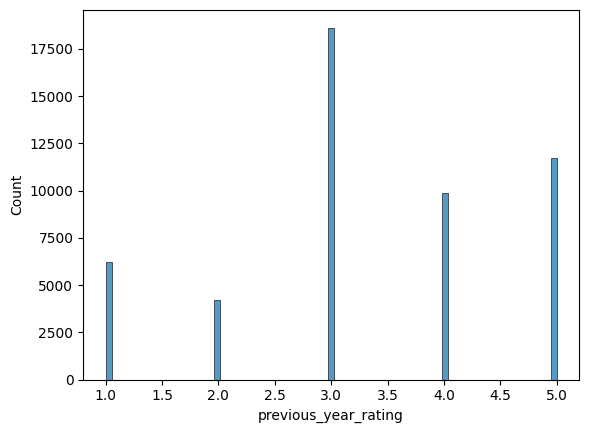

In [12]:
sns.histplot(x=df['previous_year_rating'])

Since categorical columns filling education and rating column's null value with mode value during preprocessing.

Outlier Detection

<Axes: ylabel='avg_training_score'>

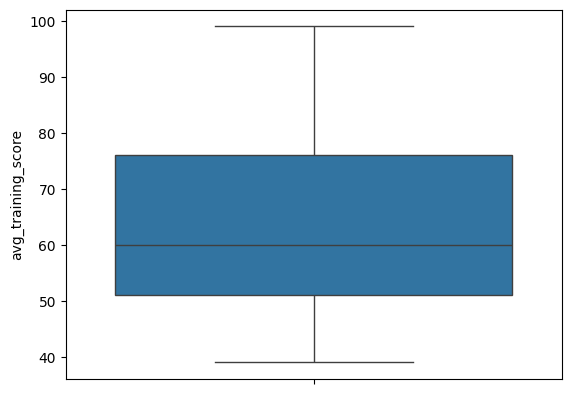

In [22]:
sns.boxplot(y=df['avg_training_score'])

# Preprocessing

In [23]:
df['education']=df['education'].fillna(df['education'].mode()[0])

In [24]:
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

In [26]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [36]:
df_test['education']=df_test['education'].fillna(df_test['education'].mode()[0])

In [37]:
df_test['previous_year_rating']=df_test['previous_year_rating'].fillna(df_test['previous_year_rating'].mode()[0])

In [38]:
df_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


**Encoding and Scaling**

In [ ]:
# education- ordinal column
# region,department,gender,recruitment_channel- nominal

In [64]:
X_train= df.drop('is_promoted',axis=1)
y_train= df['is_promoted']

In [65]:
X_test=df_test

In [80]:
num_col_new = ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']

In [81]:
cat_col_new = ['department', 'region', 'gender', 'recruitment_channel']

In [82]:
ord_col=['education']

In [86]:
education_order = [['Below Secondary',"Bachelor's", "Master's & above"]]

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder

preprocessor= ColumnTransformer(transformers=[
    ('num',StandardScaler(),num_col_new),
    ('cat',OneHotEncoder(),cat_col_new),
    ('ord',OrdinalEncoder(categories=education_order),ord_col)
])

In [88]:
X_train_preprocessed=preprocessor.fit_transform(X_train)

In [89]:
X_test_preprocessed=preprocessor.fit_transform(X_test)

# Model Selection

Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [91]:
model.fit(X_train_preprocessed,y_train)

LogisticRegression()

In [92]:
y_pred=model.predict(X_test_preprocessed)

In [95]:
lr=pd.DataFrame({
    'employee_id':X_test['employee_id'],
    'is_promoted':y_pred
})

In [96]:
lr.to_csv('lr.csv', index=False)

KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_preprocessed,y_train)

KNeighborsClassifier()

In [98]:
y_pred_knn= knn.predict(X_test_preprocessed)

In [103]:
k=pd.DataFrame({
    'employee_id':X_test['employee_id'],
    'is_promoted':y_pred_knn
})

In [104]:
k.to_csv('k.csv', index=False)

Support Vector Machine

In [101]:
from sklearn.svm import SVC

svc= SVC(kernel='rbf')
svc.fit(X_train_preprocessed,y_train)

SVC()

In [102]:
y_pred_svc=svc.predict(X_test_preprocessed)

In [105]:
support=pd.DataFrame({
    'employee_id':X_test['employee_id'],
    'is_promoted':y_pred_svc
})

In [106]:
support.to_csv('support.csv', index=False)

Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

dtr=DecisionTreeClassifier()
dtr.fit(X_train_preprocessed,y_train)

DecisionTreeClassifier()

In [108]:
y_pred_dtr=dtr.predict(X_test_preprocessed)

In [109]:
decision=pd.DataFrame({
    'employee_id':X_test['employee_id'],
    'is_promoted':y_pred_dtr
})

In [110]:
decision.to_csv('decision.csv', index=False)

Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

rfr=RandomForestClassifier()
rfr.fit(X_train_preprocessed,y_train)

RandomForestClassifier()

In [112]:
y_pred_rfr=rfr.predict(X_test_preprocessed)

In [113]:
random=pd.DataFrame({
    'employee_id':X_test['employee_id'],
    'is_promoted':y_pred_rfr
})

In [114]:
random.to_csv('random.csv', index=False)

Hyperparameter Tuning

In [115]:
from sklearn.model_selection import RandomizedSearchCV

rf_base=RandomForestClassifier(random_state=42,n_jobs=1)

param_dist={
    'n_estimators':[100,200,300,400],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sort',0.8] #0.8=80% of features
}

In [118]:
rf_search=RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=1,
    random_state=42
)

In [120]:
rf_search.fit(X_train_preprocessed,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=30, max_features=0.8, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  59.6s
[CV] END max_depth=30, max_features=0.8, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  53.2s
[CV] END max_depth=30, max_features=0.8, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time= 1.1min
[CV] END max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time= 4.3min
[CV] END max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time= 4.6min


KeyboardInterrupt: 

In [ ]:
print("Best parameters:",rf_search.best_params_)
print("Best CV score (neg MSE):", rf_search.best_score_)

In [ ]:
best_rf = rf_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_preprocessed)